# Titanic: Machine Learning from Disaster

In [2]:
import pandas as pd
from sklearn import tree
import seaborn as sns

## Шаг 4

In [3]:
titanic_data = pd.read_csv('data/titanic/train.csv')
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Описание полей:

    Survived - выжил или нет
    Pclass - класс билета
    SibSp - братьев и сестер/супругов
    Parch - родителей/детей на борту титиника
    Fare - тариф
    Cabin - номер каюты
    Embarked - порт погрузки, C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# первым делом надо понять сколько данных у нас не заполнено
# узнаем кол-во
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

[Text(0.6125, 0.975, 'Sex_female <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]\nclass = Died'),
 Text(0.3891203703703704, 0.925, 'Fare <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]\nclass = Died'),
 Text(0.19722222222222222, 0.875, 'Age <= 13.5\nentropy = 0.558\nsamples = 415\nvalue = [361, 54]\nclass = Died'),
 Text(0.08333333333333333, 0.825, 'SibSp <= 2.0\nentropy = 0.567\nsamples = 15\nvalue = [2, 13]\nclass = Survived'),
 Text(0.07592592592592592, 0.775, 'Parch <= 0.5\nentropy = 0.371\nsamples = 14\nvalue = [1, 13]\nclass = Survived'),
 Text(0.06851851851851852, 0.725, 'Fare <= 15.015\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Died'),
 Text(0.06111111111111111, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Survived'),
 Text(0.07592592592592592, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Died'),
 Text(0.08333333333333333, 0.725, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = Survived'),
 Text(0.0907407407

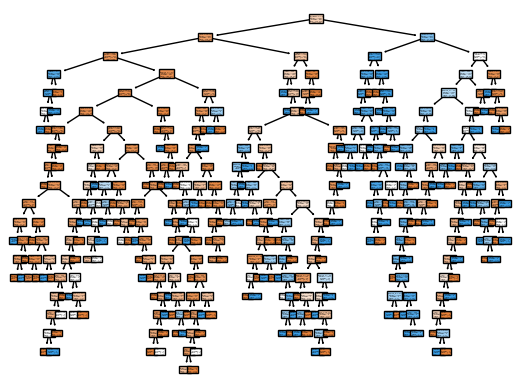

In [13]:
# для обучения, удалим некотрые переменные из датасета
drop_col = [
  'PassengerId', # бесполезное
  'Survived', # убираем т.к. будем ее предсказывать
  'Name', # бесполезно т.к. это можно сказаь уникальное для пассажира, не имет смысла использовать для выявления какой-то закономерности
  'Ticket', # убираем, т.к. это просто строковый ид-тор
  'Cabin' # убираем из-за большого кол-ва пропусков
]

X = titanic_data.drop(drop_col, axis=1) # фичи
y = titanic_data['Survived'] # будем предсказывать

# необходимо конвертировать строковые переменные в числовые для дерева
# get_dummies - не трогает переменные которые записаны в числовом виде, но при этом другие менят на 0 или 1
X = pd.get_dummies(X)

# заполним пропущенные значения для age
# возьмем медиану, Можно было обучить модель для предсказания возраста, но пока возьмем по простому
# или можно взять медиану для м и ж отдельно
X = X.fillna({'Age': X['Age'].median()})

# дерево решений
# ограничим уровень роста до 5
cls = tree.DecisionTreeClassifier(criterion='entropy')

learn_tree = cls.fit(X, y)

tree.plot_tree(learn_tree, filled=True, class_names=['Died', 'Survived'], feature_names=list(X))

Выше видно, что дерево получилось огромное, можно сказать, что мы переобучили дерево. Возможно стоит задать макс.глубину для дерева.
Теперь посчитаем качество обучения нашего дерева

In [29]:
# будем показывать нашему дереву два набора данных
# данные на которых оно обучится и 
# данные на которых будет тестироваться
from sklearn.model_selection import train_test_split

# train_test_split - разбивает данные, возвращает 4-е значения
#   test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# посмотрим качество обучения на тренировочных данных с макс глубиной
learn_score = round(cls.score(X, y) * 100, 2)
print('Качество обуч. на тренировочных данных, без max_depth =', learn_score)

# посмотрим качество обучения на разделенных тренировочных данных с макс глубиной
# переобучим на разделенные данных
cls.fit(X_train, y_train)
learn_score_split_train = round(cls.score(X_train, y_train) * 100, 2)
print('Качество обуч. на разделенных тренировочных данных(67%), без max_depth =', learn_score_split_train)


# посмотрим качество обучения на разделенных тестовых данных с макс глубиной
# это те данные которые наш классификатор не видел
learn_score_split_test = round(cls.score(X_test, y_test) * 100, 2)
print('Качество обуч. на разделенных тестовых данных(33%), без max_depth =', learn_score_split_test)


Качество обуч. на тренировочных данных, без max_depth = 91.58
Качество обуч. на разделенных тренировочных данных(67%), без max_depth = 97.99
Качество обуч. на разделенных тестовых данных(33%), без max_depth = 77.29


На тестовых данных которые не видело дерево показывает 78% верных ответов, есть проблема. Возможно она возникла из-за сильного переобучения дерева. Попробуем ограничить дерево с помощью max_depth. Возможно дерево вместо того, чтобы найти в наших данных какую-то закономерность которую можно обобщить и применить на новые данные, наше дерево занималось тем, что пыталось как можно лучше решить конкретную частную задачу - классифицировать пассажиров титаника. И возможная причина в том, что мы не ограничили кол-во ресурсов которое дерево может потратить на это.

Качество обуч. на тренировочных данных, с max_depth 5 = 84.06


[Text(0.4435483870967742, 0.9166666666666666, 'Sex_female <= 0.5\nentropy = 0.953\nsamples = 596\nvalue = [374, 222]\nclass = Died'),
 Text(0.1774193548387097, 0.75, 'Age <= 3.5\nentropy = 0.696\nsamples = 390\nvalue = [317, 73]\nclass = Died'),
 Text(0.06451612903225806, 0.5833333333333334, 'SibSp <= 3.0\nentropy = 0.779\nsamples = 13\nvalue = [3, 10]\nclass = Survived'),
 Text(0.03225806451612903, 0.4166666666666667, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = Survived'),
 Text(0.0967741935483871, 0.4166666666666667, 'Age <= 2.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = Died'),
 Text(0.06451612903225806, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Died'),
 Text(0.12903225806451613, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Survived'),
 Text(0.2903225806451613, 0.5833333333333334, 'Fare <= 52.277\nentropy = 0.651\nsamples = 377\nvalue = [314, 63]\nclass = Died'),
 Text(0.22580645161290322, 0.4166666666666667, 'Fare <= 36.877\nentro

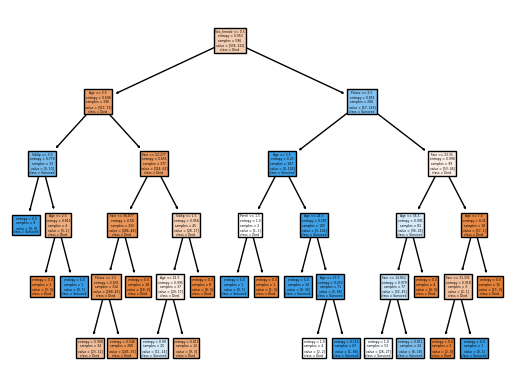

In [39]:
# ограничим дерево, например max_depth = 5
cls_max_depth_5 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

# обучим на разделенных train данных
lear_tree = cls_max_depth_5.fit(X_train, y_train)
learn_score_max_depth = round(cls_max_depth_5.score(X_train, y_train) * 100, 2)
print('Качество обуч. на тренировочных данных, с max_depth 5 =', learn_score_max_depth)
#tree.plot_tree(lear_tree, filled=True, class_names=['Died', 'Survived'], feature_names=list(X_train))

82.94 - т.е. с max_depth классификатор стал работат хуже, но что если мы покажем данные которые он не видел ?

In [41]:
round(cls_max_depth_5.score(X_test, y_test) * 100, 2)

81.02

81.02% - а вот на данных которые он не видел, класс. стал работать лучше